In [4]:
from sklearn.datasets import make_blobs
import pandas as pd

In [5]:
#make blobs
n_class = 5
blobs = make_blobs(n_samples=1000, n_features=2, centers=n_class,random_state=0)
X,label = blobs
df = {"x":X[:,0],"y":X[:,1],"label":label}
df = pd.DataFrame(data=df)
df.to_csv("data.csv")

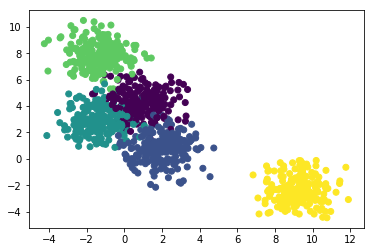

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=label)

In [8]:
#build model
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten,Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop,Adam,SGD
from keras.regularizers import l2
import tensorflow as tf
# import tensorflow.keras as keras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import TensorBoard


In [9]:
def build_model(n_class=5):
    model = Sequential()
    model.add(Dense(n_class,activation="softmax",input_shape=(2,),kernel_regularizer=l2(2e-4)))
        
    return model


In [10]:
model = build_model(n_class=5)


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [13]:
tensorboard = TensorBoard(log_dir="graph/multi_class/")
rms = tf.train.GradientDescentOptimizer(0.01)
model.compile(loss=tf.keras.losses.categorical_crossentropy
              , optimizer=rms
             ,metrics=["acc",tf.keras.metrics.categorical_crossentropy])


In [14]:
# training

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

y = to_categorical(list(label),n_class)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25)
print(x_train.shape)
print(x_test.shape)
print(y.shape,y[0])

(750, 2)
(250, 2)
(1000, 5) [0. 0. 0. 1. 0.]


In [15]:
his = model.fit(x_train,y_train,epochs=50,validation_split=0.25,batch_size=32
               ,callbacks=[tensorboard,EarlyStopping(monitor='val_loss',patience=20)])

Train on 562 samples, validate on 188 samples
Epoch 1/50
562/562 [==============================] - 1s 927us/step - loss: 2.1169 - acc: 0.2153 - categorical_crossentropy: 2.1164 - val_loss: 1.4439 - val_acc: 0.2979 - val_categorical_crossentropy: 1.4434
Epoch 2/50
562/562 [==============================] - 0s 669us/step - loss: 1.3321 - acc: 0.3274 - categorical_crossentropy: 1.3317 - val_loss: 1.1243 - val_acc: 0.4681 - val_categorical_crossentropy: 1.1239
Epoch 3/50
562/562 [==============================] - 0s 669us/step - loss: 1.1254 - acc: 0.4573 - categorical_crossentropy: 1.1250 - val_loss: 1.0190 - val_acc: 0.5160 - val_categorical_crossentropy: 1.0186
Epoch 4/50
562/562 [==============================] - 0s 669us/step - loss: 1.0356 - acc: 0.4822 - categorical_crossentropy: 1.0352 - val_loss: 0.9563 - val_acc: 0.5213 - val_categorical_crossentropy: 0.9558
Epoch 5/50
562/562 [==============================] - 0s 669us/step - loss: 0.9780 - acc: 0.4858 - categorical_crossentrop

562/562 [==============================] - 0s 673us/step - loss: 0.5912 - acc: 0.8434 - categorical_crossentropy: 0.5902 - val_loss: 0.5533 - val_acc: 0.8564 - val_categorical_crossentropy: 0.5523
Epoch 41/50
562/562 [==============================] - 0s 658us/step - loss: 0.5867 - acc: 0.8470 - categorical_crossentropy: 0.5858 - val_loss: 0.5497 - val_acc: 0.8564 - val_categorical_crossentropy: 0.5487
Epoch 42/50
562/562 [==============================] - 0s 673us/step - loss: 0.5834 - acc: 0.8416 - categorical_crossentropy: 0.5824 - val_loss: 0.5444 - val_acc: 0.8723 - val_categorical_crossentropy: 0.5434
Epoch 43/50
562/562 [==============================] - 0s 655us/step - loss: 0.5796 - acc: 0.8452 - categorical_crossentropy: 0.5786 - val_loss: 0.5399 - val_acc: 0.8723 - val_categorical_crossentropy: 0.5389
Epoch 44/50
562/562 [==============================] - 0s 673us/step - loss: 0.5757 - acc: 0.8470 - categorical_crossentropy: 0.5746 - val_loss: 0.5363 - val_acc: 0.8723 - val_

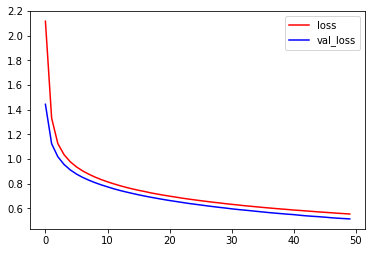

In [16]:
# plot history training
loss = his.history["loss"]
val_loss = his.history["val_loss"]

fig = plt.figure()
plt.plot(loss,"r-",label="loss")
plt.plot(val_loss,"b-",label="val_loss")
plt.legend()
plt.savefig("training_loss_multi_class.png")

In [17]:
model.evaluate(x_test,y_test)

250/250 [==============================] - 0s 24us/step


[0.5414421963691711, 0.8480000009536743, 0.5403190064430237]

In [317]:
# pred = model.predict(x_test)
# pred[pred<0.5] = 0
# pred[pred>=0.5] = 1


In [18]:
import numpy as np
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

sklearn.metrics.confusion_matrix(y_pred,y_test)


array([[41,  5,  5,  0,  0],
       [ 1, 39,  0,  0,  0],
       [ 0,  0, 38,  1,  0],
       [12,  0,  8, 45,  0],
       [ 0,  6,  0,  0, 49]], dtype=int64)

In [19]:
model.get_weights()

[array([[-0.13901736,  0.20141049, -1.6273203 , -1.0428289 ,  0.45349452],
        [ 0.6851008 ,  0.08603889,  0.3521965 ,  0.84108603, -0.55362827]],
       dtype=float32),
 array([-0.03816566,  0.5843425 ,  0.5094134 , -0.621407  , -0.43418247],
       dtype=float32)]

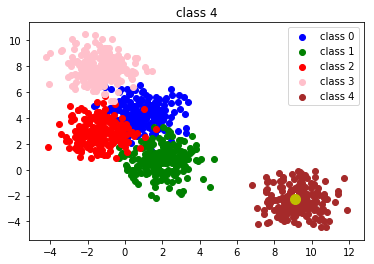

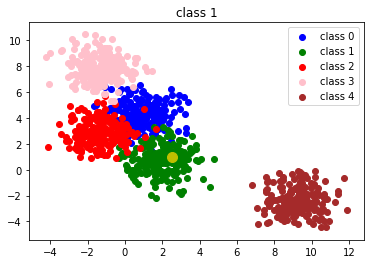

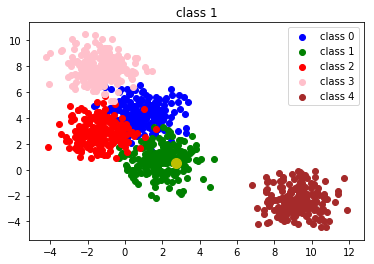

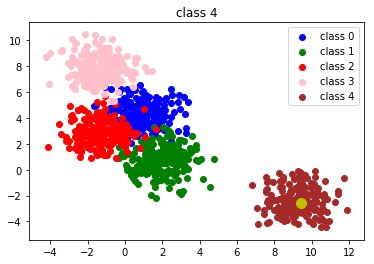

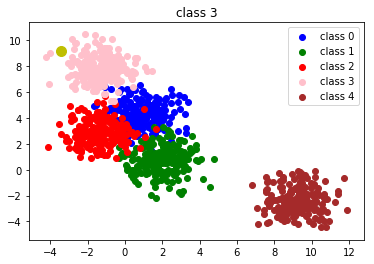

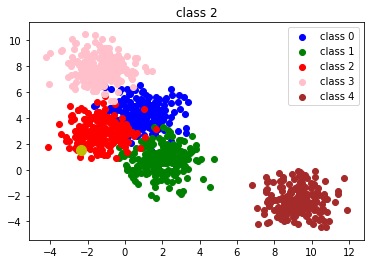

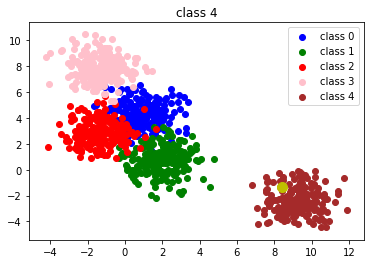

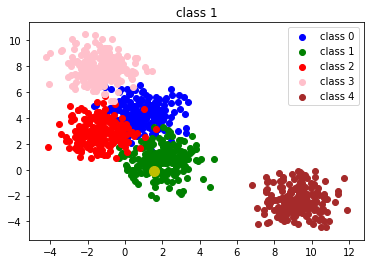

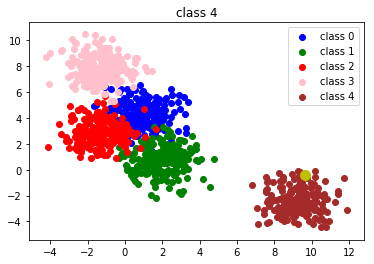

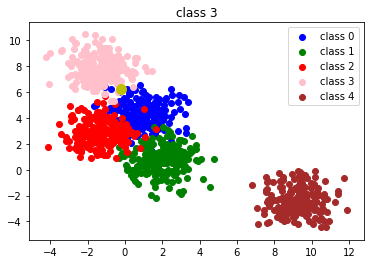

In [20]:
fig = plt.figure()
for k in range(10):
    x = x_test[k]
    x = np.expand_dims(x,axis=0)

    colors = ["b","g","r","pink","brown"] # blue : 0 , green : 1 , red : 2
    for i in range(n_class):
        xx = X[label==i]
        plt.scatter(xx[:,0],xx[:,1],c=colors[i],label="class %d"%i)
        plt.title("class %d"%model.predict(x).argmax())
        
    plt.scatter(x[:,0],x[:,1],c="y",s=100)
    plt.legend()
    plt.pause(0.1)
    
plt.show()


In [33]:
json_string = model.to_json()
print(type(json_string))
import pprint,json
pprint.pprint(json.loads(json_string))

<class 'str'>
{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'softmax',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 2],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'VarianceScaling',
                                                          'config': {'distribution': 'uniform',
                                                                     'mode': 'fan_avg',
                             

In [47]:
fresh_model = tf.keras.models.model_from_json(json_string)
fresh_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
